# 2A.ML101.4: Supervised Learning: Regression of Housing Data

Here we'll do a short example of a regression problem: learning a continuous value
from a set of features.

We'll use the simple Boston house prices set, available in scikit-learn.  This
records measurements of 13 attributes of housing markets around Boston, as well
as the median price.  The question is: can you predict the price of a new
market given its attributes?

*Source:* [Course on machine learning with scikit-learn](https://github.com/GaelVaroquaux/sklearn_ensae_course) by Gaël Varoquaux

In [1]:
from sklearn.datasets import load_boston
data = load_boston()
print(data.data.shape)
print(data.target.shape)

(506, 13)
(506,)


C:\Python395_x64\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.
   

We can see that there are just over 500 data points.

The ``DESCR`` variable has a long description of the dataset:

In [2]:
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

It often helps to quickly visualize pieces of the data using histograms, scatter plots,
or other plot types.  Here we'll load pylab and show a histogram of the target values:
the median price in each neighborhood.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

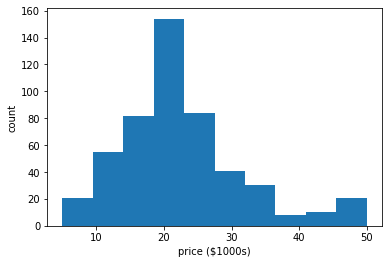

In [4]:
plt.hist(data.target)
plt.xlabel('price ($1000s)')
plt.ylabel('count');

Let's have a quick look to see if some features are more relevant than others for our problem

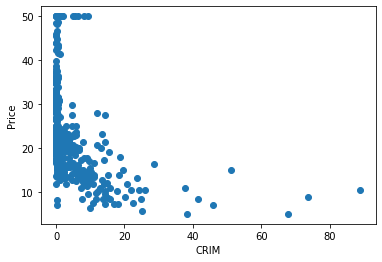

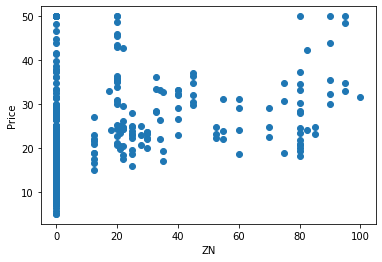

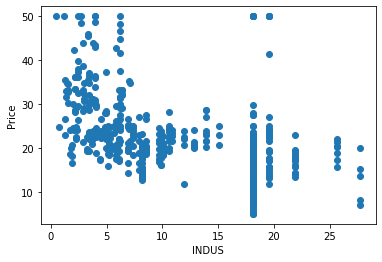

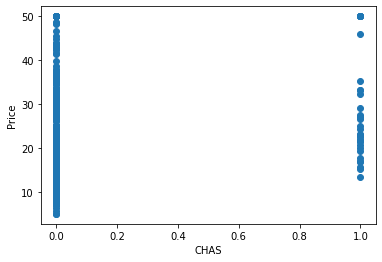

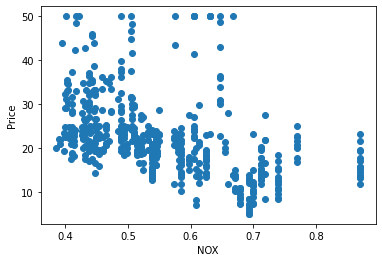

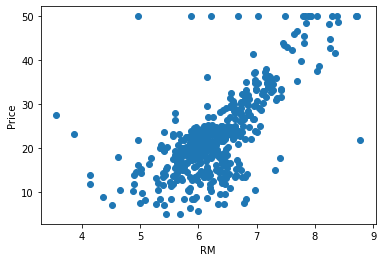

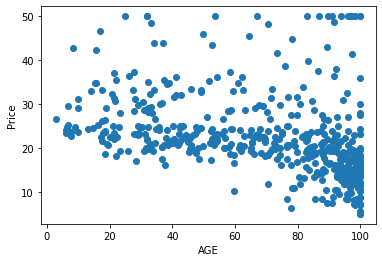

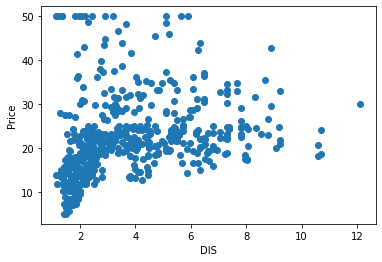

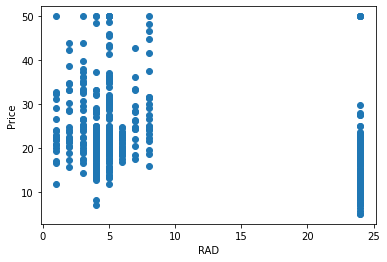

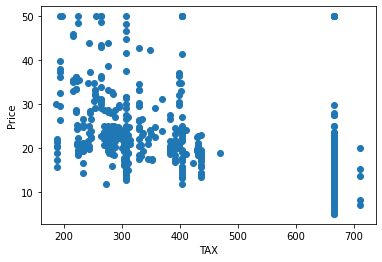

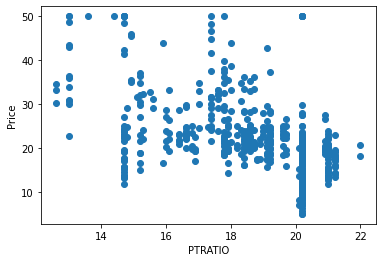

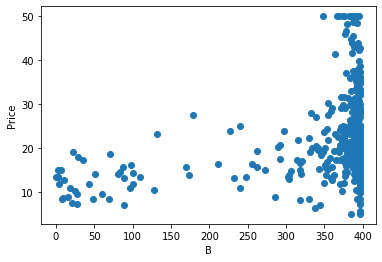

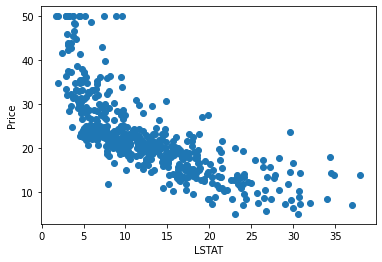

In [5]:
for index, feature_name in enumerate(data.feature_names):
    plt.figure()
    plt.scatter(data.data[:, index], data.target)
    plt.ylabel('Price')
    plt.xlabel(feature_name)

This is a manual version of a technique called **feature selection**.

Sometimes, in Machine Learning it is useful to use 
feature selection to decide which features are most useful for a
particular problem.  Automated methods exist which quantify this sort
of exercise of choosing the most informative features.

## Predicting Home Prices: a Simple Linear Regression

Now we'll use ``scikit-learn`` to perform a simple linear regression
on the housing data.  There are many possibilities of regressors to
use. A particularly simple one is ``LinearRegression``: this is
basically a wrapper around an ordinary least squares calculation.

We'll set it up like this:

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target)

In [7]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
clf.fit(X_train, y_train)

LinearRegression()

In [8]:
predicted = clf.predict(X_test)
expected = y_test

RMS: 4.590323054795548


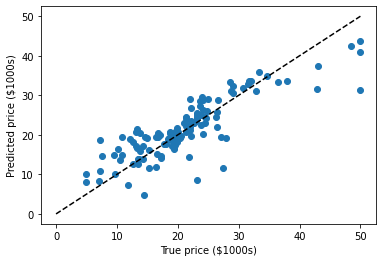

In [9]:
plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:", np.sqrt(np.mean((predicted - expected) ** 2)))

The prediction at least correlates with the true price, though there
are clearly some biases.  We could imagine evaluating the performance
of the regressor by, say, computing the RMS residuals between the
true and predicted price.  There are some subtleties in this, however,
which we'll cover in a later section.

## Exercise: Gradient Boosting Tree Regression

There are many other types of regressors available in scikit-learn:
we'll try a more powerful one here.

**Use the GradientBoostingRegressor class to fit the housing data**.

You can copy and paste some of the above code, replacing `LinearRegression`
with `GradientBoostingRegressor`.

In [10]:
from sklearn.ensemble import GradientBoostingRegressor
# Instantiate the model, fit the results, and scatter in vs. out

### Solution:

RMS: 2.6786343244050994


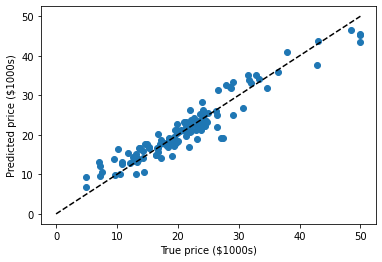

In [11]:
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor()
clf.fit(X_train, y_train)

predicted = clf.predict(X_test)
expected = y_test

plt.scatter(expected, predicted)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.xlabel('True price ($1000s)')
plt.ylabel('Predicted price ($1000s)')
print("RMS:", np.sqrt(np.mean((predicted - expected) ** 2)))